# Análise de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

### # Análise Inicial (Limpeza, Tratamento e Padronização)

Inicialmente começamos com uma análise geral dos dados, analisando suas colunas, dTypes e contagem de valores nulos caso sugerem limpeza.

In [3]:
df1 = pd.read_csv('vendas_supermercado.csv')
df1.head(5)

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5901 non-null   int64  
 1   CODIGO_PEDIDO          5901 non-null   object 
 2   DATA_PEDIDO            5901 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

Aqui percebemos que, como há presença de 100 linhas com dados faltantes por coluna, elas foram excluídas por representarem de < 2% dos dados, portanto a exclusão foi realizada (ao invés de uma imputação por média, mediana ou moda por exemplo) pois dessa forma não afeta nossa análise. Julguei melhor a criação de um novo dataset limpo para não correr o risco de análise errônea dos dados.

In [5]:
df_semNaN = df1.dropna()
df_semNaN.to_csv("vendas_supermercado2.csv", index=False)

In [6]:
df = pd.read_csv('vendas_supermercado2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5801 non-null   int64  
 1   CODIGO_PEDIDO          5801 non-null   object 
 2   DATA_PEDIDO            5801 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

Função que usei de análise caso haja valores não únicos ou outra inconsistência (como dígitos, caractéres...) e fosse necessário padronizar (não precisou!)

In [7]:
for i in ['SEGMENTO_CLIENTE', 'SUB_CATEGORIA_PRODUTO']:
    print(df[i].unique())

['Corporate' 'Consumer' 'Home Office']
['Bookcases' 'Phones' 'Storage' 'Accessories' 'Tables' 'Binders' 'Copiers'
 'Art' 'Furnishings' 'Paper' 'Envelopes' 'Chairs' 'Fasteners' 'Appliances'
 'Labels' 'Supplies' 'Machines']


## #1. Compreensão do Perfil dos Clientes

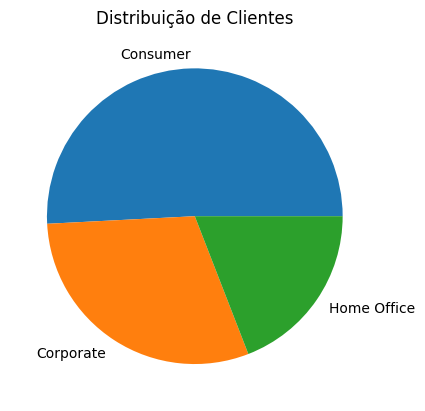

In [8]:
soma = df['SEGMENTO_CLIENTE'].value_counts()
plt.pie(soma, labels=soma.index)
plt.title('Distribuição de Clientes')
plt.show()

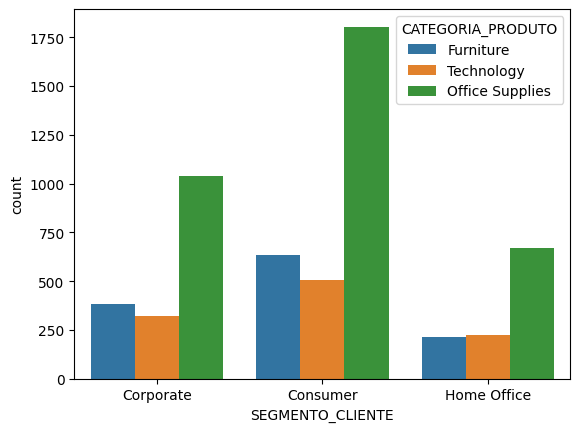

In [9]:
sns.countplot(data=df, x='SEGMENTO_CLIENTE', hue='CATEGORIA_PRODUTO')
plt.show()

Com esses dois gráficos, conseguimos perceber a alta demanda de consumidores no supermercado, principalmente na categoria "Office Supplies", referente à quantidade de materiais de escritório, que é uma categoria que também prevalece nos outros dois tipos de cliente.

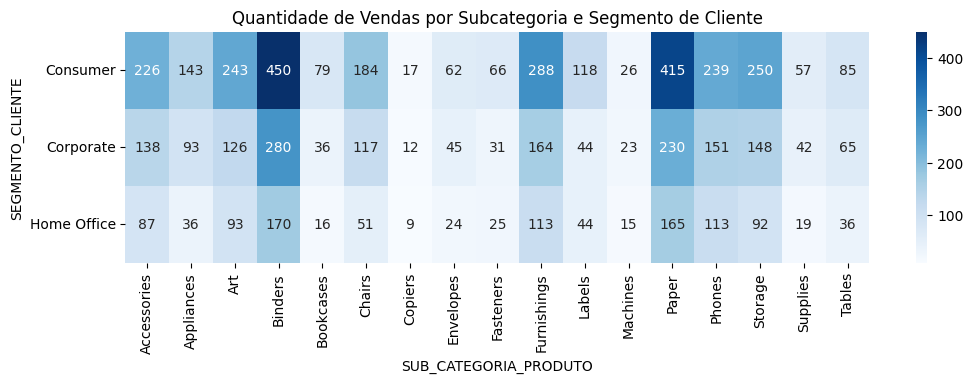

In [10]:
tabel = pd.crosstab(df['SEGMENTO_CLIENTE'], df['SUB_CATEGORIA_PRODUTO'])
plt.figure(figsize=(12,3))
sns.heatmap(tabel, annot=True, fmt="d", cmap="Blues")
plt.title('Quantidade de Vendas por Subcategoria e Segmento de Cliente')
plt.show()

Dessa maneira, utilizei um heatmap para analisar a quantidade de vendas das subcategorias de maneira mais específica para cada tipo de cliente. Escolhi usar a função crosstab do Pandas, pois ela foca na contagem de variáveis categóricas. Observamos que nos três tipos de clientes: papéis, fichários e móveis são altamente adquiridos, com menos atenção à máquinas e copiadoras.

## # 2. Avaliação do Desempenho das Vendas

### # 2.1 Lucro Geral

In [11]:
lucro1 = df.groupby('CATEGORIA_PRODUTO')['LUCRO'].sum()
percent = (lucro1 / df['LUCRO'].sum()) * 100
percent.sort_values(ascending=False)

CATEGORIA_PRODUTO
Technology         51.601934
Office Supplies    42.439227
Furniture           5.958838
Name: LUCRO, dtype: float64

Embora os artigos de escritório (Office Suplies) sejam mais requisitados em quantidade como vimos anteriormente, Tecnologia vence em questão de lucro, representando mais de 50% dos lucros de venda.

C:\Users\Julia\AppData\Local\Temp\ipykernel_18636\4068200077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SUB_CATEGORIA_PRODUTO', y='LUCRO', data=lucrototal, palette=cols, errorbar=None)


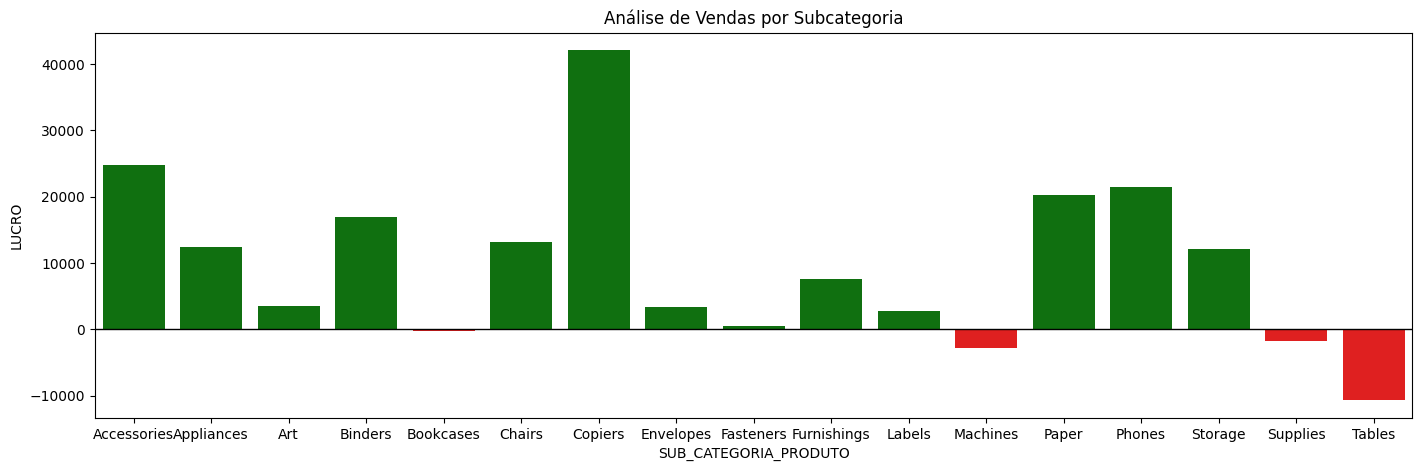

In [56]:
plt.figure(figsize=(17,5))

lucrototal = df.groupby('SUB_CATEGORIA_PRODUTO')['LUCRO'].sum().reset_index()

cols = ['red' if x < 0 else 'green' for x in lucrototal['LUCRO']]
sns.barplot(x='SUB_CATEGORIA_PRODUTO', y='LUCRO', data=lucrototal, palette=cols, errorbar=None)

plt.axhline(0, color='black', linewidth=1)
plt.title('Análise de Vendas por Subcategoria')
plt.show()

Nesse gráfico em barra, podemos ver que embora copiadoras, como analisadas na análise #1, são as menos requisitadas em quantidade, elas são as que geram mais lucro geral como subcategoria. Todavia, é evidente que o custo de mesas (Tables) foram maiores do que a receita, que gerou bastante prejuízo, assim como em máquinas (Machines), suprimentos (Supplies) e estantes (Bookcases).

### # 2.2 Lucro por Modo de Pagamento 

In [14]:
lucro1 = df.groupby('MODO_PAGAMENTO')['LUCRO'].sum()
percent = (lucro1 / df['LUCRO'].sum()) * 100
percent.sort_values(ascending=False)

MODO_PAGAMENTO
COD       46.095162
Online    31.214163
Cards     22.690675
Name: LUCRO, dtype: float64

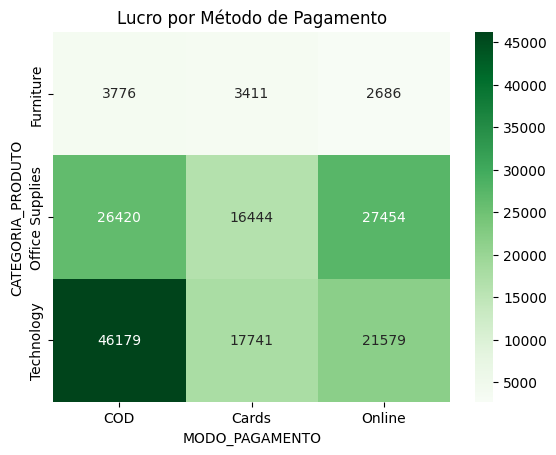

In [13]:
pag = pd.pivot_table(
    df,
    values='LUCRO',
    index='CATEGORIA_PRODUTO',
    columns='MODO_PAGAMENTO',
    aggfunc='sum')
sns.heatmap(pag, annot=True, fmt=".0f", cmap="Greens")
plt.title('Lucro por Método de Pagamento')
plt.show()

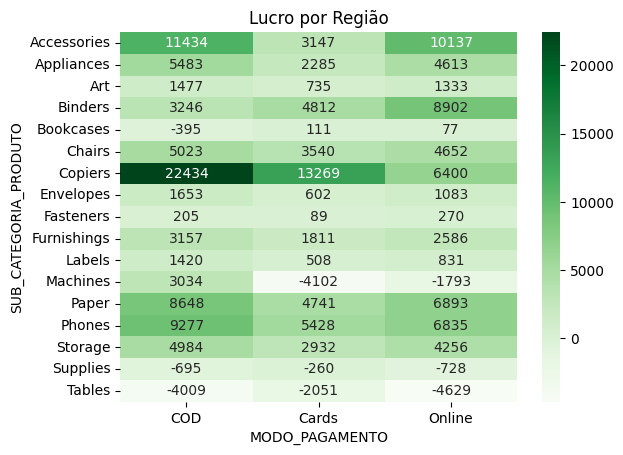

In [15]:
regiao = pd.pivot_table(df,
    values='LUCRO',
    index='SUB_CATEGORIA_PRODUTO',  
    columns='MODO_PAGAMENTO',         
    aggfunc='sum')

sns.heatmap(regiao, annot=True, fmt=".0f", cmap="Greens")
plt.title('Lucro por Região')
plt.show()

Para mim que utilizava o Excel, foi uma surpresa descobrir que existia uma função equivalente no pandas para criar tabelas dinâmicas, portanto utilizei essa função do pandas agregando os dados, para analisar cruzadamente a soma dos lucros com a forma de pagamento. O resultado é cerca de 46.1% de lucro em "COD", conhecido como Cash on Delivery ou Pagamento na Entrega, com enfoque em vendas de Copiadoras, que entra na categoria de Technology.

### # 2.3 Lucro por Região 

In [17]:
lucro1 = df.groupby('REGIAO')['LUCRO'].sum()
percent = (lucro1 / df['LUCRO'].sum()) * 100
percent.sort_values(ascending=False)

REGIAO
West       40.004532
East       31.312896
Central    15.111593
South      13.570980
Name: LUCRO, dtype: float64

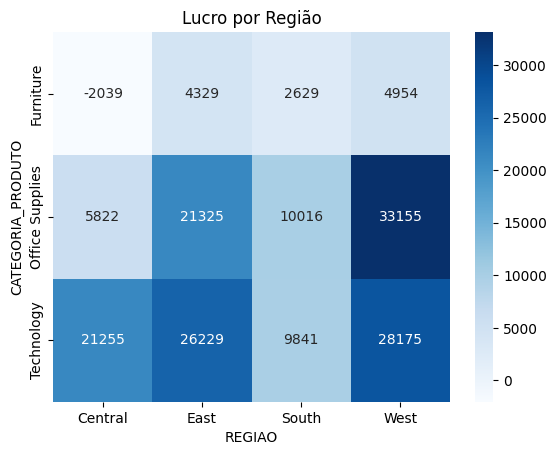

In [16]:
regiao = pd.pivot_table(df,
    values='LUCRO',
    index='CATEGORIA_PRODUTO',  
    columns='REGIAO',         
    aggfunc='sum')

sns.heatmap(regiao, annot=True, fmt=".0f", cmap="Blues")
plt.title('Lucro por Região')
plt.show()

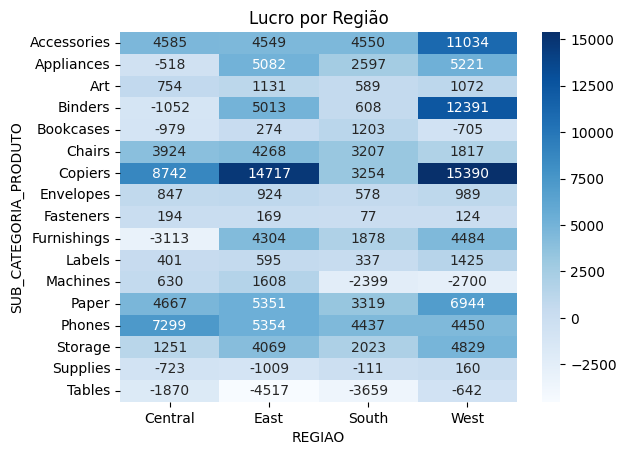

In [18]:
regiao = pd.pivot_table(df,
    values='LUCRO',
    index='SUB_CATEGORIA_PRODUTO',  
    columns='REGIAO',         
    aggfunc='sum')

sns.heatmap(regiao, annot=True, fmt=".0f", cmap="Blues")
plt.title('Lucro por Região')
plt.show()

De maneira similar, cruzei Categoria por Região, apresentando concentração de lucro na região Oeste, e também Leste, ambas representando 71,31% do lucro total. O maior lucro na região Oeste, surpreendentemente não é Technology, mas Office Supplies, concentrado em vendas de Copiadoras e Fichários. Embora as vendas de Tecnologia sejam mais bem distríbuidas, Artigos de Escritório possuem seu lucro concentrado em certas regiões.

## #3. Eficácia das Entregas e Pagamentos.

### # 3.1 Análise da Forma de Entrega

In [19]:
print(df.groupby('FORMA_ENTREGA')['LUCRO'].mean().sort_values(ascending=False))

FORMA_ENTREGA
First Class       30.905627
Second Class      30.246018
Standard Class    27.902912
Same Day          23.058707
Name: LUCRO, dtype: float64


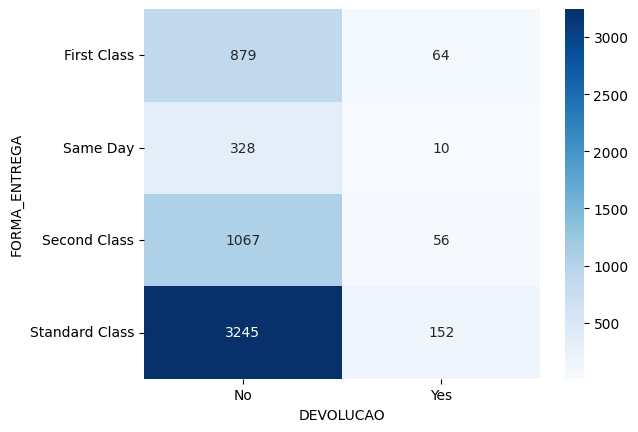

In [20]:
tabel = pd.crosstab(df['FORMA_ENTREGA'], df['DEVOLUCAO'])
sns.heatmap(tabel, annot=True, fmt="d", cmap="Blues")
plt.show()

Calculando a média do lucro de acordo com a forma de entrega, a média de lucro é maior nas pessoas compram primeira e segunda classe, que não gera tanta devolução quanto a classe padrão de entrega, sendo essa a que mais gera devoluções de conteúdo, sugerindo uma relação direta das devoluções como esse tipo de entrega.

### # 3.2 Análise do Modo de Pagamento

In [21]:
print(df.groupby('MODO_PAGAMENTO')['LUCRO'].mean().sort_values(ascending=False))

MODO_PAGAMENTO
COD       31.586113
Cards     29.885733
Online    24.338280
Name: LUCRO, dtype: float64


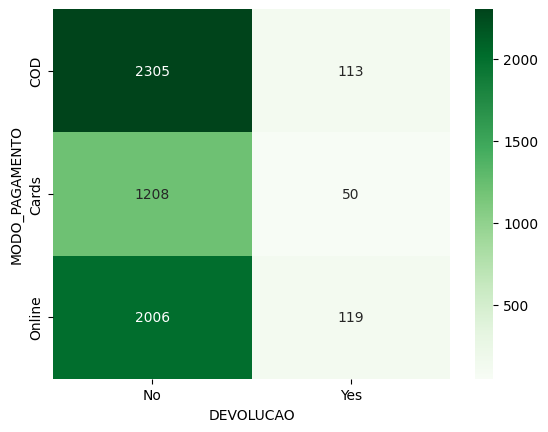

In [22]:
tabel = pd.crosstab(df['MODO_PAGAMENTO'], df['DEVOLUCAO'])
sns.heatmap(tabel, annot=True, fmt="d", cmap="Greens")
plt.show()

Dessa mesma maneira, o método de pagamento utilizando cartão, sendo o menos utilizado é o que menos gera devolução. Por outro lado, 'COD' sendo mais utilizado gerando mais lucro, e compete com o método 'Online' em maior quantidade de devoluções.